## 표준화 또는 정규화를 해야 하는 이유

- 항상 표준화 (평균0, 분산 1로), 정규화(0과 1사이에 오도록)를 반드시 해야 하는 것은 아니지만 많은 경우에 정규화를 하면 성능이 향상되는 경우가 있습니다. scale이 다르면 분석할 때 영향을 주기 때문입니다. 

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [124]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [125]:
type(cancer)

sklearn.utils.Bunch

In [126]:
dir(cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [127]:
cancer.data.shape

(569, 30)

In [128]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [129]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [130]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [131]:
np.bincount(cancer.target) # cancer.target[cancer.target==0].shape

array([212, 357], dtype=int64)

In [132]:
for i,name in enumerate(cancer.feature_names):
    print('%02d : %s' %(i,name)) # 0을 안붙이면 앞에 0을 안붙이고, 02를 안붙이면 숫자를 앞으로 땡겨쓴다.

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


In [133]:
cancer.target_names # malignant(악성), benign(양성)

array(['malignant', 'benign'], dtype='<U9')

In [134]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


In [135]:
_, bins=np.histogram(cancer.data[:,0], bins=20)
np.histogram(cancer.data[:,0], bins=20)

(array([ 4, 15, 31, 48, 93, 92, 71, 58, 32, 23, 22, 28, 27, 11,  2,  5,  2,
         2,  0,  3], dtype=int64),
 array([ 6.981  ,  8.03745,  9.0939 , 10.15035, 11.2068 , 12.26325,
        13.3197 , 14.37615, 15.4326 , 16.48905, 17.5455 , 18.60195,
        19.6584 , 20.71485, 21.7713 , 22.82775, 23.8842 , 24.94065,
        25.9971 , 27.05355, 28.11   ]))

Text(0.5, 1.0, 'mean radius')

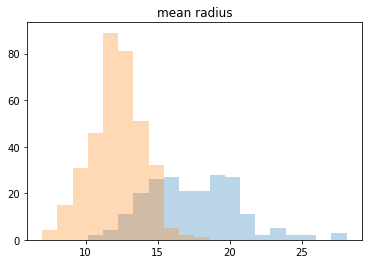

In [136]:
plt.hist(malignant[:,0],bins=bins, alpha=0.3)
plt.hist(benign[:,0], bins=bins ,alpha=0.3)
plt.title(cancer.feature_names[0])

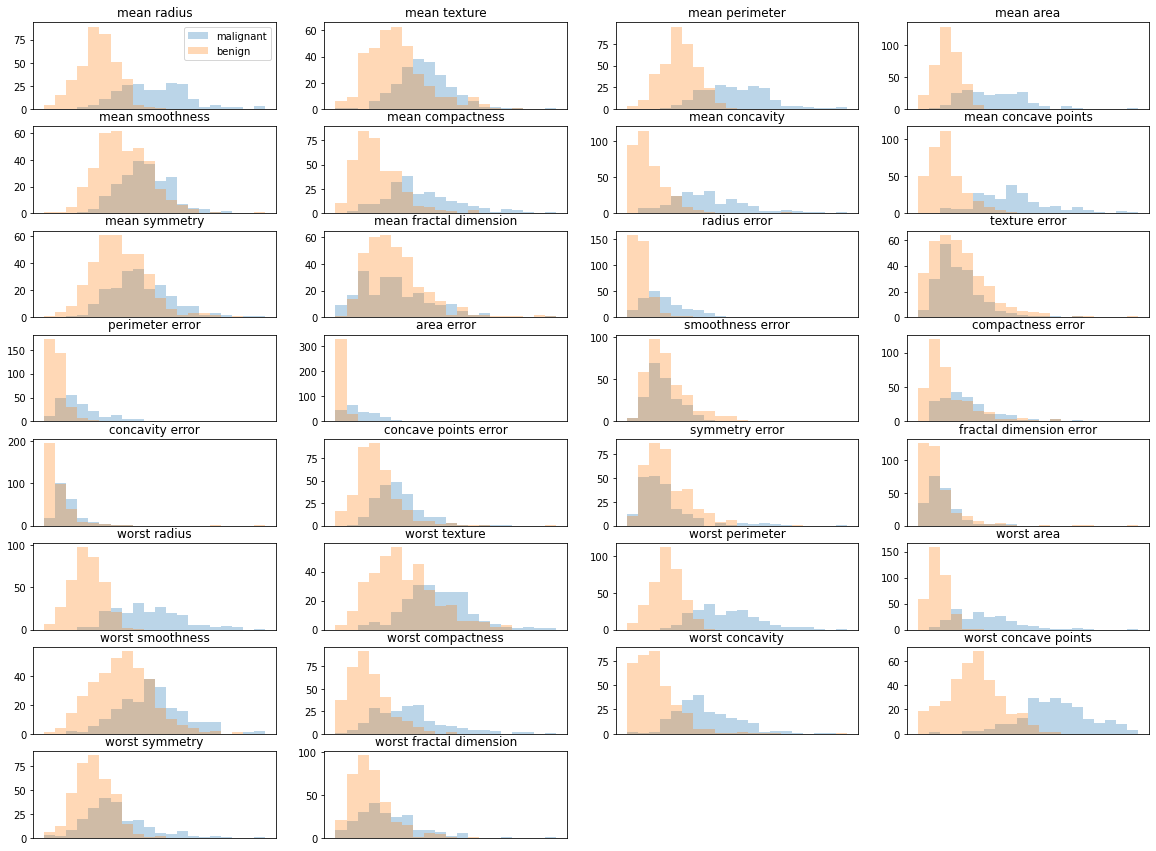

In [137]:
plt.figure(figsize=[20,15])

for col in range(30):
    plt.subplot(8,4,col+1)
    _, bins=np.histogram(cancer.data[:,col], bins=20)

    plt.hist(malignant[:,col],bins=bins, alpha=0.3)
    plt.hist(benign[:,col], bins=bins ,alpha=0.3)
    plt.title(cancer.feature_names[col])
    if col==0: plt.legend(cancer.target_names)
    plt.xticks([])

- 10번 반복해서 Logistic Regression 과 선형 SVM 을 적용해 보자. train_test_split() 함수에서 랜덤하게 데이터를 나누기 때문에 매번 점수가 달라진다.
- 선형 SVM 의 결과가 좋지 못하다. 이것은 데이터 정규화를 하지 않았기 때문으로 보인다.

In [138]:
from sklearn.linear_model import LogisticRegression

scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

    model = LogisticRegression()
    model.fit(X_train,y_train)

    score = model.score(X_test,y_test)
    scores.append(score)

print('scores =', scores)

C:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

scores = [0.9230769230769231, 0.972027972027972, 0.9230769230769231, 0.9230769230769231, 0.951048951048951, 0.9300699300699301, 0.9790209790209791, 0.951048951048951, 0.9440559440559441, 0.965034965034965]


C:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

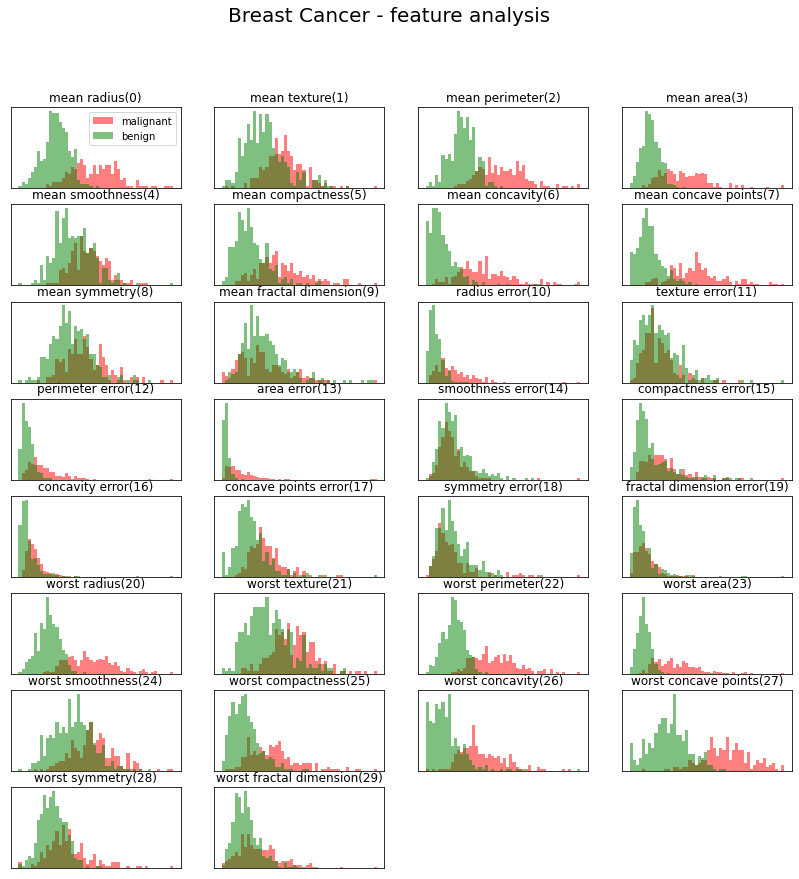

In [139]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

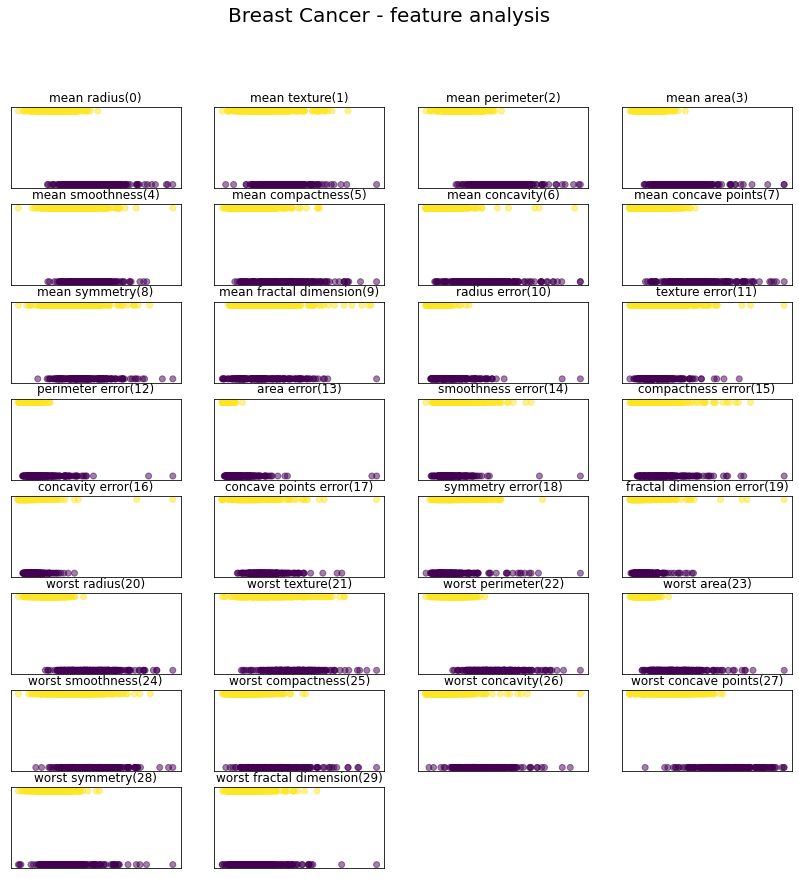

In [140]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
#     f_,bins=np.histogram(cancer.data[:,col],bins=50)
#     plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
#     plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    plt.scatter(cancer.data[:,col], cancer.target, c=cancer.target, alpha=0.5)
    
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
#     if col==0: plt.legend()

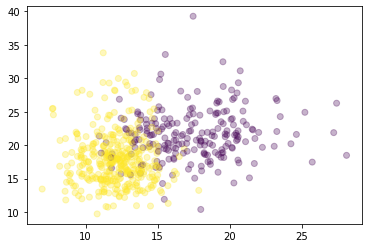

In [141]:
col1= 15
col2= 28

plt.scatter(cancer.data[:,0], cancer.data[:,1], c=cancer.target, alpha=0.3)

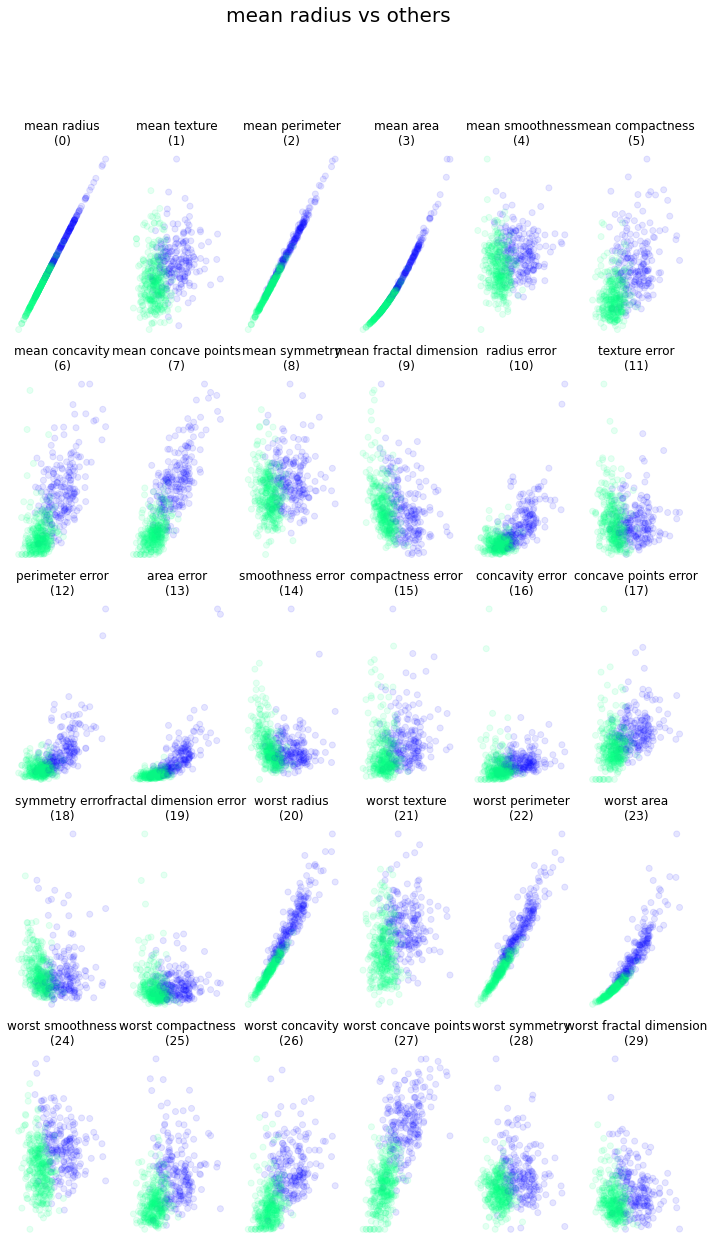

In [142]:
fig,axes = plt.subplots(5,6,figsize=[12,20])
fig.suptitle('mean radius vs others', fontsize=20)

for i in range(30):
    ax=axes.ravel()[i]
    ax.scatter(cancer.data[:,0],cancer.data[:,i], c=cancer.target, cmap='winter', alpha=0.1)
    ax.set_title(cancer.feature_names[i]+('\n(%d)' % i))
    ax.set_axis_off()

In [143]:
#모든 속성에 대해서 한번에 그래프를 그릴수 없으므로 상관관계를 수치를 통해 데이터를 파악한다.
mat=np.corrcoef(cancer.data.T)  # 열로 읽으므로 Transpose 시켜줘야 한다.
mat

#상관계수: 모든 점에 대해서 (c1-c1')(c2-c2')을 나눠준 값의 합을 표준편차1,표준편차2,n으로 나눠준다.

array([[ 1.00000000e+00,  3.23781891e-01,  9.97855281e-01,
         9.87357170e-01,  1.70581187e-01,  5.06123578e-01,
         6.76763550e-01,  8.22528522e-01,  1.47741242e-01,
        -3.11630826e-01,  6.79090388e-01, -9.73174431e-02,
         6.74171616e-01,  7.35863663e-01, -2.22600125e-01,
         2.05999980e-01,  1.94203623e-01,  3.76168956e-01,
        -1.04320881e-01, -4.26412691e-02,  9.69538973e-01,
         2.97007644e-01,  9.65136514e-01,  9.41082460e-01,
         1.19616140e-01,  4.13462823e-01,  5.26911462e-01,
         7.44214198e-01,  1.63953335e-01,  7.06588569e-03],
       [ 3.23781891e-01,  1.00000000e+00,  3.29533059e-01,
         3.21085696e-01, -2.33885160e-02,  2.36702222e-01,
         3.02417828e-01,  2.93464051e-01,  7.14009805e-02,
        -7.64371834e-02,  2.75868676e-01,  3.86357623e-01,
         2.81673115e-01,  2.59844987e-01,  6.61377735e-03,
         1.91974611e-01,  1.43293077e-01,  1.63851025e-01,
         9.12716776e-03,  5.44575196e-02,  3.52572947e-

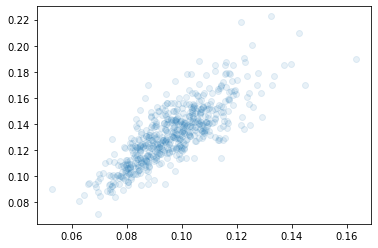

In [144]:
plt.scatter(cancer.data[:,4], cancer.data[:,24], alpha=0.1)

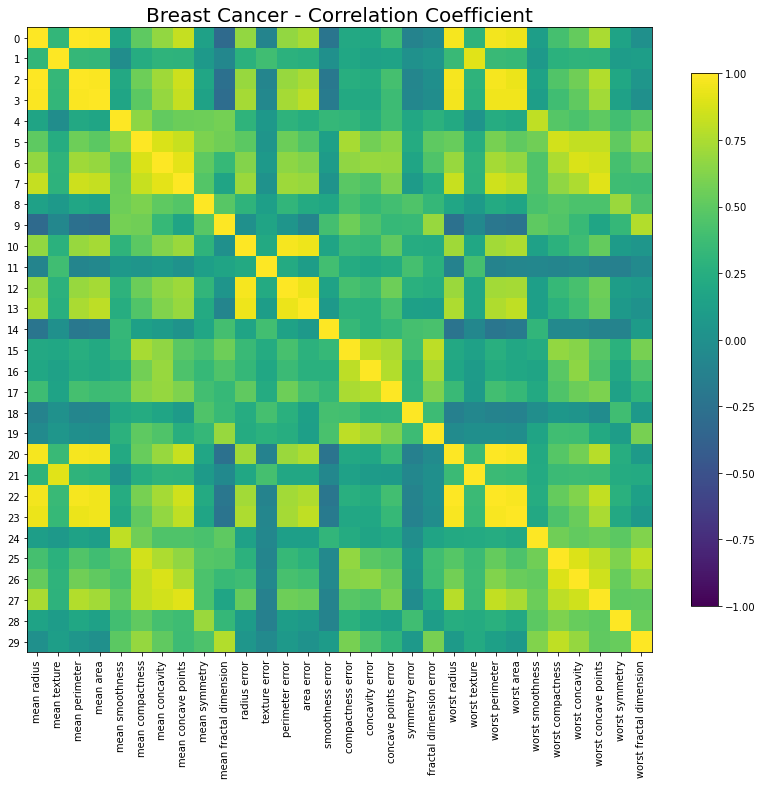

In [145]:
# 속성간의 관계를 한 눈에 파악
fig=plt.figure(figsize=[14,14])
plt.title('Breast Cancer - Correlation Coefficient',fontsize=20)
plt.imshow(mat, interpolation='none', vmin=-1, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(30),cancer.feature_names,rotation=90,ha='center')
plt.yticks(range(30))
print('')

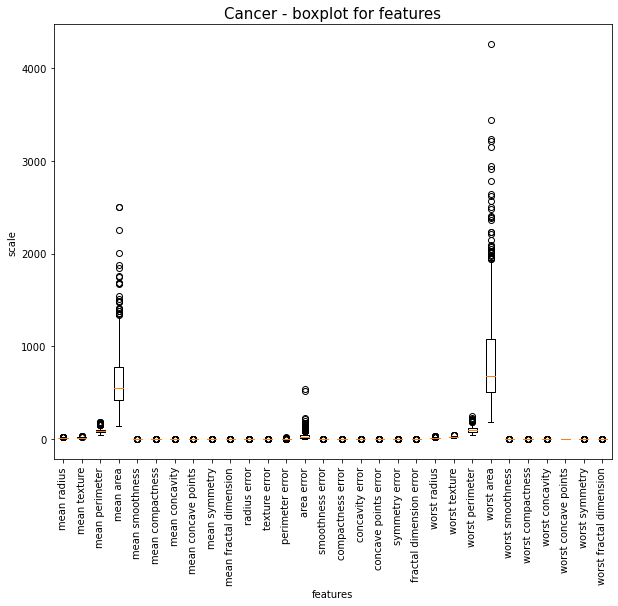

In [146]:
fig=plt.figure(figsize=[10,8])
plt.title('Cancer - boxplot for features',fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90)
#plt.ylim(0,1) # y축 길이를 바꿔보자
plt.xlabel('features')
plt.ylabel('scale')
print('')

- 단위가 서로 다르다.
- cancer.data를 평균은 0 표준편차를 1로 변환하자

In [147]:
# 속성별 평균
m = cancer.data.mean(axis=0)

# 속성별 표준편차
s = cancer.data.std(axis=0)

# 정규확인 데이터
data2 = (cancer.data - m)/s

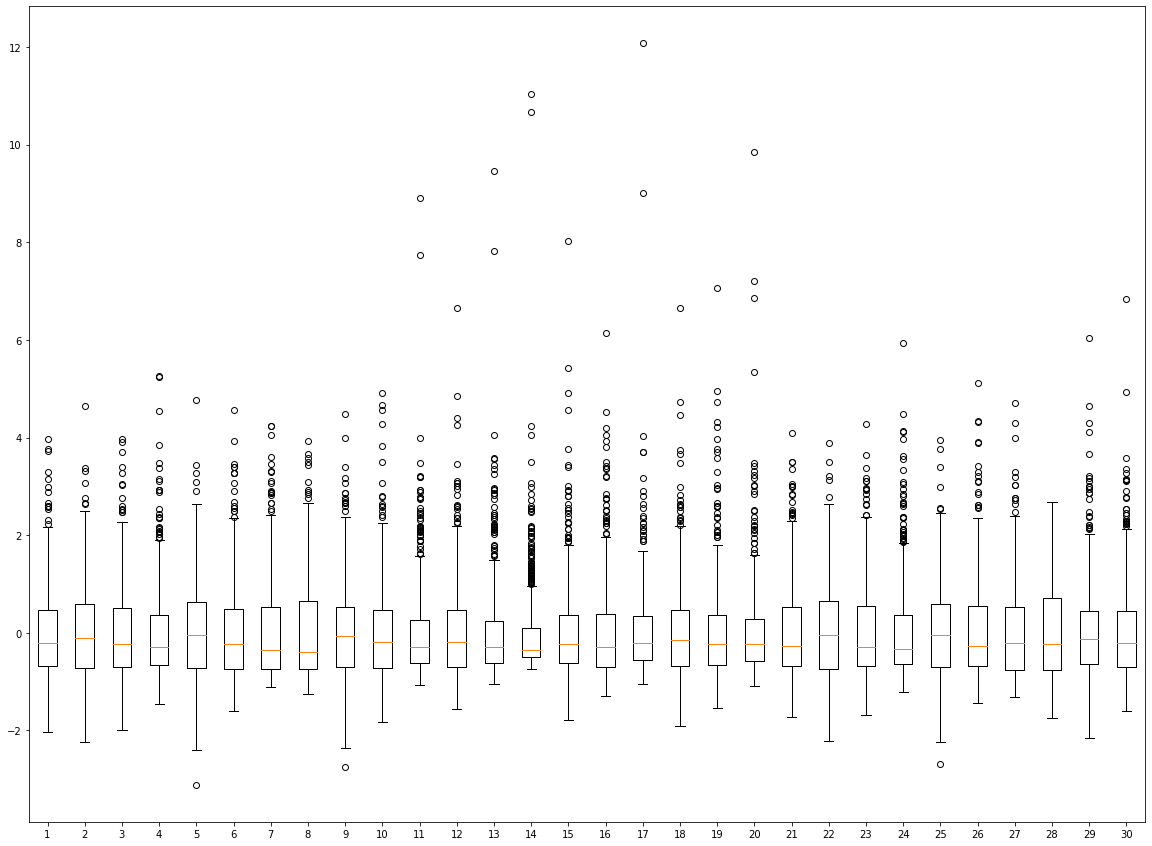

In [148]:
fig=plt.figure(figsize=[20,15])
plt.boxplot(data2)
pass

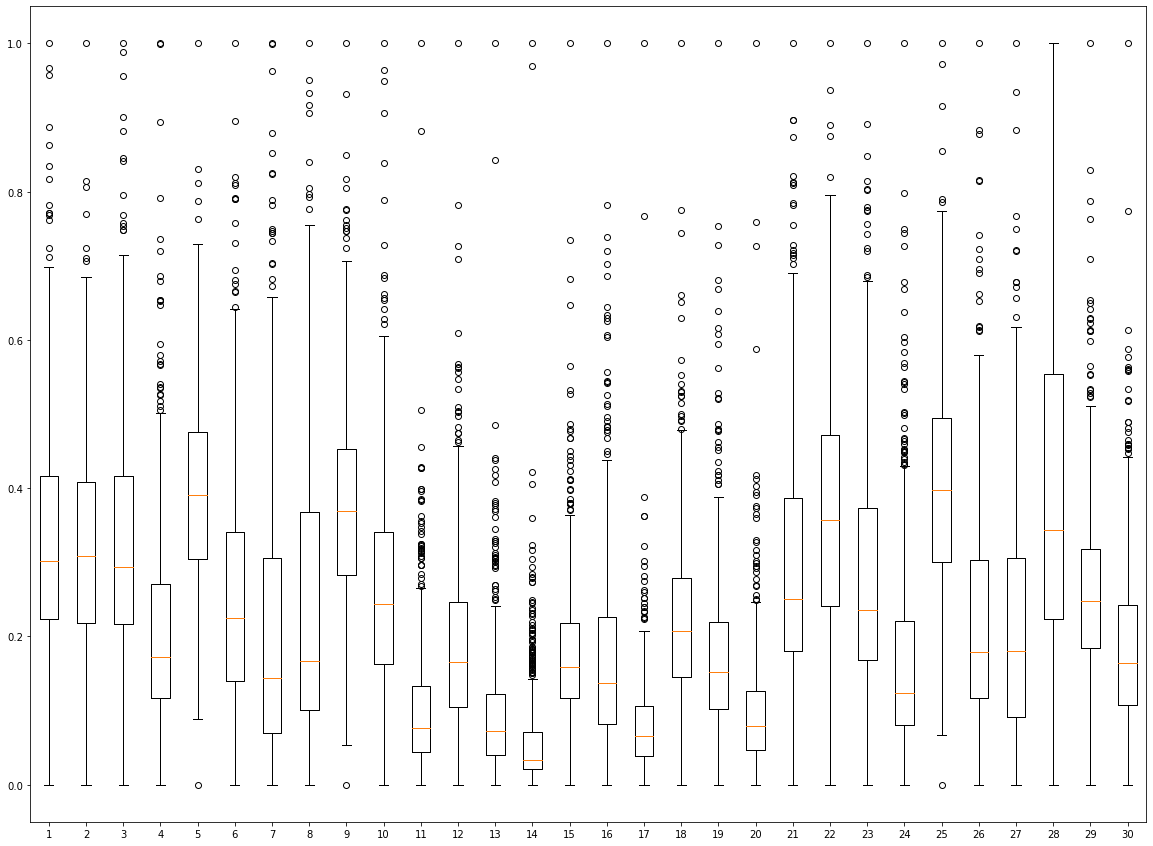

In [149]:
m1 = cancer.data.max(axis=0)
m2 = cancer.data.min(axis=0)

data3 = (cancer.data-m2)/(m1-m2)

fig=plt.figure(figsize=[20,15])
plt.boxplot(data3)
pass

- 크기를 맞췄다.

## kNN, LinearSVM, Logistic Regression을 적용
- train_test_split() 적용 후 score 확인
- 원본 데이터와 정규화된 데이터 비교

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
score

0.9300699300699301

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X2_train,X2_test,y_train,y_test = train_test_split(data2,cancer.target)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X2_train,y_train)

score = model.score(X2_test,y_test)
score

0.965034965034965

In [152]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

0.3076923076923077


C:\Users\math\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [153]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X2_train, y_train)

score = model.score(X2_test, y_test)
print(score)

0.986013986013986


In [154]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
score = model. score(X_test,y_test)
score

C:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6643356643356644

In [155]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X2_train,y_train)
score = model.score(X2_test,y_test)
score

0.993006993006993

In [156]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

model = LogisticRegression()
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(score_train, score_test)

C:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9553990610328639 0.965034965034965
